In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cbook, colors as mcolors
from matplotlib.image import AxesImage
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox, TransformedBbox, BboxTransformTo
import seaborn as sns

# 1) 경사그래프

In [12]:
plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'slopeChart'
filename = '../../data/매출.csv'
plt.rcParams['axes.unicode_minus'] = False

left_label
['사과(70점)', '배(30점)', '감(50점)', '오렌지(60점)', '파인애플(80점)']
slopeChart_01.png 파일이 저장되었습니다.


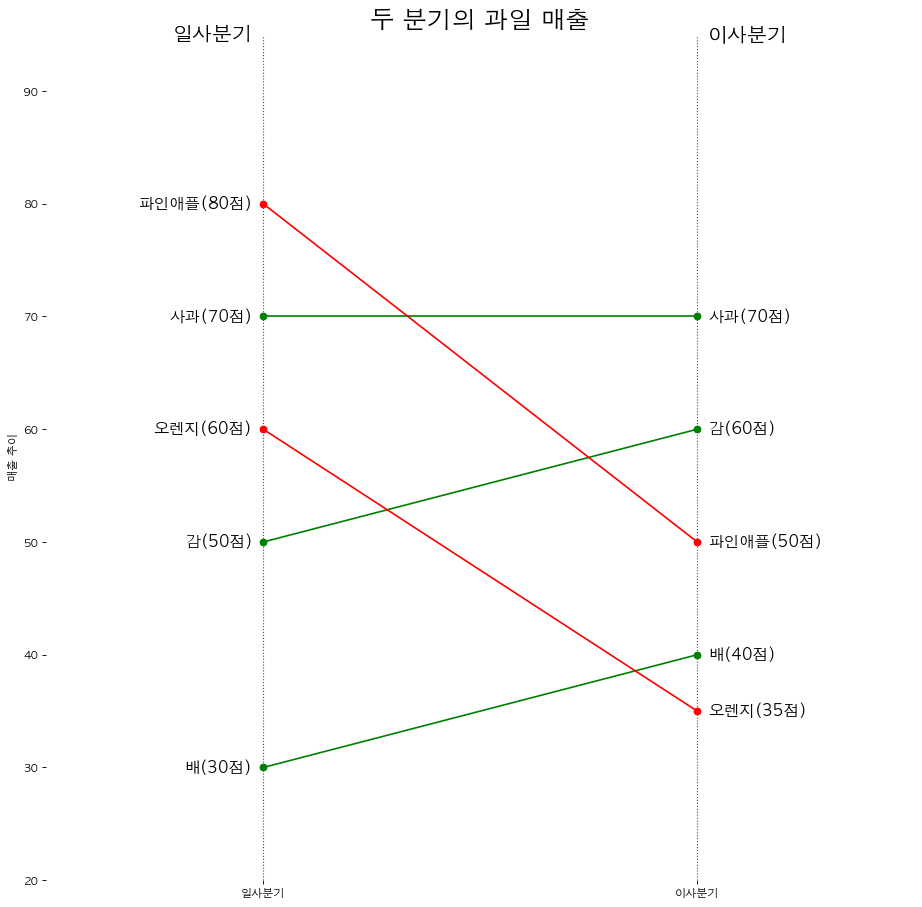

In [13]:
df = pd.read_csv(filename, encoding='cp949')

fig1, ax = plt.subplots(1, 1, figsize=(14, 14), dpi= 80)

HUNDRED = 90
MIN_HEIGHT = 20
MAX_HEIGHT = HUNDRED + 5

# 수직선 그리기
ax.vlines(x=1, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')


ax.scatter(y=df['일사분기'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['이사분기'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)


idx = 0

left_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['일사분기'])]
print('left_label')
print(left_label)

right_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['이사분기'])]



def newline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

for p1, p2 in zip(df['일사분기'], df['이사분기']):
    newline([1, p1], [3, p2]) # 연결선을 그려 주고
    # 선들에 대한 caption 작성하기
    ax.text(1-0.05, p1, left_label[idx], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, right_label[idx], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    idx = idx + 1

ax.text(1-0.05, HUNDRED + 5, '일사분기', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, HUNDRED + 5, '이사분기', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title('두 분기의 과일 매출', fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(MIN_HEIGHT, MAX_HEIGHT), ylabel='매출 추이')

# 하단의 x축에 대한 ticks 작성
ax.set_xticks([1, 3])
ax.set_xticklabels(['일사분기', '이사분기'])
# plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# 그래프 영역의 테두리 선(borders) 없애기
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

# 2. 리본박스그래프

In [14]:
plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'ribbonBox_exam'
filename = '../../data/연령별_실업율.csv'

In [15]:
class RibbonBox:
    original_image = plt.imread(
        cbook.get_sample_data("Minduka_Present_Blue_Pack.png"))
    cut_location = 70
    b_and_h = original_image[:, :, 2:3]
    color = original_image[:, :, 2:3] - original_image[:, :, 0:1]
    alpha = original_image[:, :, 3:4]
    nx = original_image.shape[1]

    def __init__(self, color):
        rgb = mcolors.to_rgba(color)[:3]
        self.im = np.dstack(
            [self.b_and_h - self.color * (1 - np.array(rgb)), self.alpha])

    def get_stretched_image(self, stretch_factor):
        stretch_factor = max(stretch_factor, 1)
        ny, nx, nch = self.im.shape
        ny2 = int(ny*stretch_factor)
        return np.vstack(
            [self.im[:self.cut_location],
             np.broadcast_to(
                 self.im[self.cut_location], (ny2 - ny, nx, nch)),
             self.im[self.cut_location:]])
# end class RibbonBox:

class RibbonBoxImage(AxesImage):
    zorder = 1

    def __init__(self, ax, bbox, color, *, extent=(0, 1, 0, 1), **kwargs):
        super().__init__(ax, extent=extent, **kwargs)
        self._bbox = bbox
        self._ribbonbox = RibbonBox(color)
        self.set_transform(BboxTransformTo(bbox))

    def draw(self, renderer, *args, **kwargs):
        stretch_factor = self._bbox.height / self._bbox.width

        ny = int(stretch_factor*self._ribbonbox.nx)
        if self.get_array() is None or self.get_array().shape[0] != ny:
            arr = self._ribbonbox.get_stretched_image(stretch_factor)
            self.set_array(arr)

        super().draw(renderer, *args, **kwargs)
# end class RibbonBoxImage(AxesImage):

def main():
    fig, ax = plt.subplots()

    # data = pd.read_csv(filename, index_col='국가')
    data = pd.read_csv(filename, index_col='연도', encoding='cp949')

    koreadata = data.loc['2006년', '20대':'60세이상']
    print('koreadata.index')
    print(koreadata.index)

    chartdata = [koreadata[item] for item in koreadata.index]
    print('chartdata')
    print(chartdata) # 그리고자 하는 데이터

    xdata = np.arange(0, len(chartdata))
    print('xdata')
    print(xdata)

    box_colors = [
        (0.8, 0.2, 0.2),
        (0.2, 0.8, 0.2),
        (0.2, 0.2, 0.8),
        (0.7, 0.5, 0.8),
        (0.3, 0.8, 0.7),
    ]

    for x, h, bc in zip(xdata, chartdata, box_colors):
        bbox0 = Bbox.from_extents(x - 0.4, 0., x + 0.4, h)
        bbox = TransformedBbox(bbox0, ax.transData)
        # 리본 이미지 넣기
        ax.add_artist(RibbonBoxImage(ax, bbox, bc, interpolation="bicubic"))
        # 상단의 수치 데이터를 콤마 유형으로 표시
        ax.annotate('%s' % format(h,','), (x, h), va="bottom", ha="center")

    ax.set_xlim(xdata[0] - 0.5, xdata[-1] + 0.5)
    ax.set_ylim(0, 10)

    myxticks = [item for item in koreadata.index]
    ax.set_xticks(xdata)
    ax.set_xticklabels(myxticks) # x축에 놓을 문자열
    ax.set_title('연령대별 실업률(2006년)')

    # 배경 색상을 지정합니다.
    background_gradient = np.zeros((2, 2, 4))
    background_gradient[:, :, :3] = [1, 1, 0]
    background_gradient[:, :, 3] = [[0.1, 0.3], [0.3, 0.5]]  # alpha channel
    ax.imshow(background_gradient, interpolation="bicubic", zorder=0.1,
              extent=(0, 1, 0, 1), transform=ax.transAxes, aspect="auto")

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')

    print('finished')
# end main()

main()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/sample_data/Minduka_Present_Blue_Pack.png'

## 3. 범주형 플로팅

Index(['id', 'name', 'gender', 'age', 'cancer', 'twodisease', 'fixedinsurance',
       'income ', 'department'],
      dtype='object')
     id name gender  age  cancer  twodisease fixedinsurance  income   \
0  moon  문천식     남성   68     100          50             있음     1000   
1  soon  박순천     여성   70      50          50             있음      900   
2  park  박해미     여성   51      70          30             없음      800   
3    ha  하정우     남성   45      50          50             있음      500   
4  yumi  정유미     여성   38      50          50             있음      400   

  department  
0         사무  
1         현장  
2         현장  
3         정비  
4         현장  
범주형 플로팅


/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SpecialPlot_01.png 파일이 저장되었습니다.


<Figure size 1280x800 with 0 Axes>

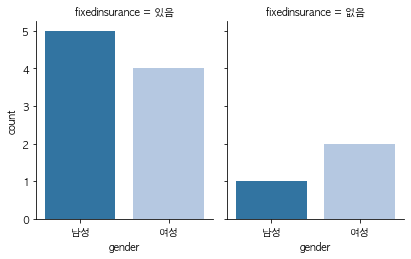

In [16]:
## 연습문제3) 범주형 플로팅 ################################################################################
## setting
plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'SpecialPlot'
# filename = './../data/welfareClean.csv'
filename = '/Users/eesun/Desktop/sejong/3-2/데이터시각화/data/insurance.csv'
plt.rcParams['axes.unicode_minus'] = False

## data load
welfare = pd.read_csv(filename, encoding='cp949')
print(welfare.columns)
print(welfare.head())

print('범주형 플로팅')

fig3 = plt.figure(figsize=(16, 10), dpi= 80)

sns.catplot('gender', col='fixedinsurance', col_wrap=2,
                data=welfare, kind="count", height=3.5,
                aspect=.8, palette='tab20')

fig3.suptitle('제목')

### file save
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')


## 4. density plot

Density Plotting
welfare['fixedinsurance'].unique()
['있음' '없음']
SpecialPlot_02.png 파일이 저장되었습니다.


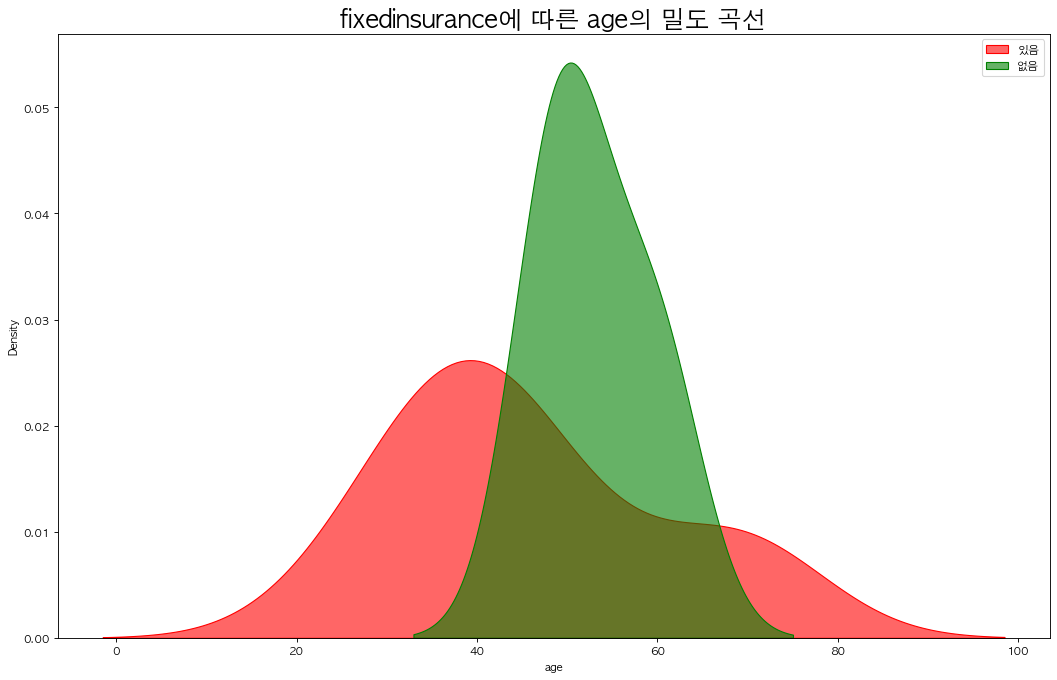

In [17]:
## 연습문제4) Density plot ################################################################################
print('Density Plotting')
print("welfare['fixedinsurance'].unique()")
print(welfare['fixedinsurance'].unique())

fig4 = plt.figure(figsize=(16,10), dpi= 80)
MY_ALPHA = 0.6
sns.kdeplot(welfare.loc[welfare['fixedinsurance'] == '있음', 'age'], shade=True, color="r", label="있음", alpha=MY_ALPHA)
sns.kdeplot(welfare.loc[welfare['fixedinsurance'] == '없음', 'age'], shade=True, color="g", label="없음", alpha=MY_ALPHA)

plt.title('fixedinsurance에 따른 age의 밀도 곡선', fontsize=22)
plt.legend()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

## 5. lollipop chart

Lollipop Chart
df
  department     cancer
0         정비  26.666667
1         현장  60.000000
2         사무  70.000000
SpecialPlot_03.png 파일이 저장되었습니다.


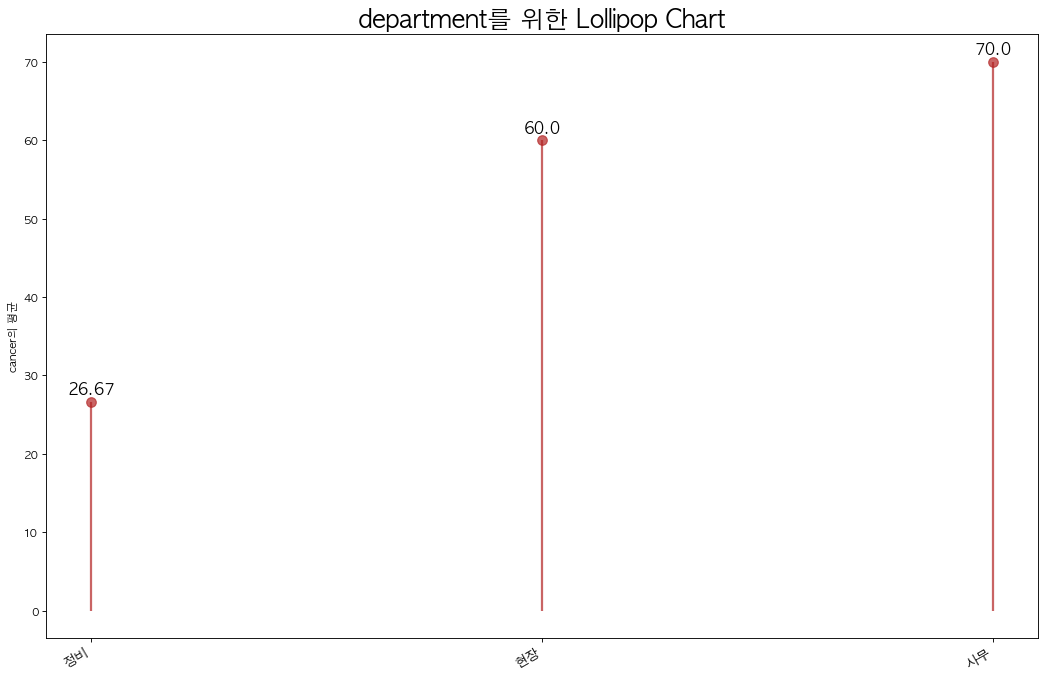

In [18]:
## 연습문제5) lollipop chart ################################################################################
'''
The lollipop chart is a composite chart with bars and circles.
It is a variant of the bar chart with a circle at the end, to highlight the data value.
Like a bar chart, a lollipop chart is used to compare categorical data
'''
print('Lollipop Chart')

### data load
df = welfare[['cancer', 'department']].groupby('department').apply(lambda x: x.mean())
df.sort_values('cancer', inplace=True)
df.reset_index(inplace=True)

print('df')
print(df)

# Draw plot
fig5, ax = plt.subplots(figsize=(16,10), dpi= 80)

# 수직선
ax.vlines(x=df.index, ymin=0, ymax=df.cancer, color='firebrick', alpha=0.7, linewidth=2)

# 상단의 점
ax.scatter(x=df.index, y=df.cancer, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('department를 위한 Lollipop Chart', fontdict={'size':22})
ax.set_ylabel('cancer의 평균')
ax.set_xticks(df.index)
ax.set_xticklabels(df.department.str.lower(), rotation=30, fontdict={'horizontalalignment': 'right', 'size':12})

# 상단에 그려 주는 cancer 정보 텍스트
for row in df.itertuples():
    ax.text(row.Index, row.cancer+.5, s=round(row.cancer, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

### file save
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')


## 6. ordered bar chart

Ordered Bar Chart
df
  department     cancer
0         정비  26.666667
1         현장  60.000000
2         사무  70.000000
df.index
RangeIndex(start=0, stop=3, step=1)
SpecialPlot_04.png 파일이 저장되었습니다.


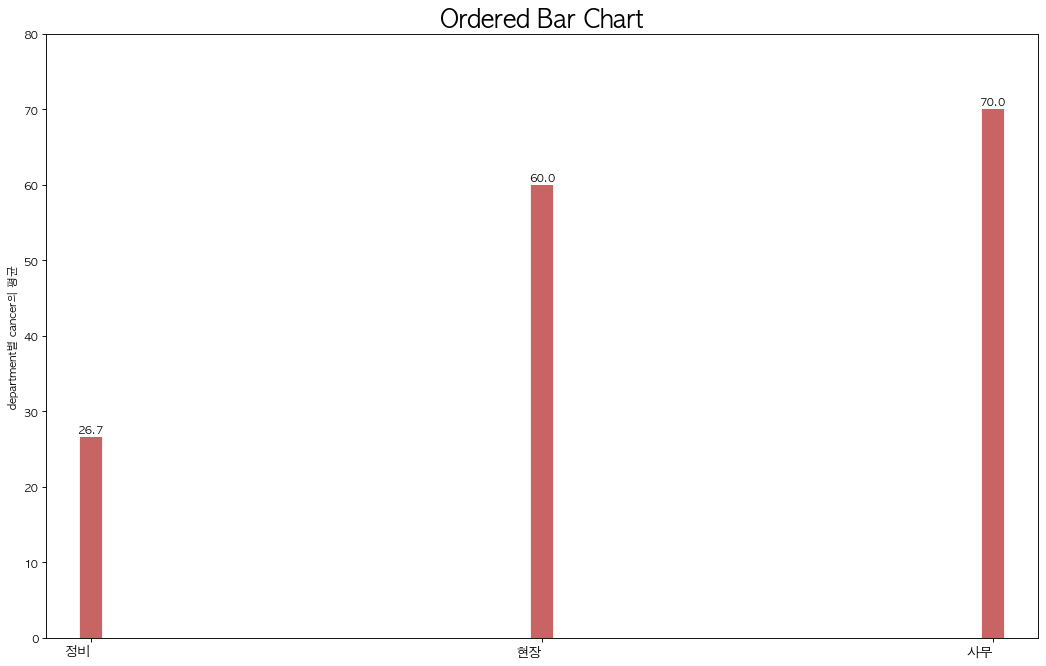

In [19]:
## 연습문제6) ordered bar chart ################################################################################
print('Ordered Bar Chart')

### data load
df = welfare[['cancer', 'department']].groupby('department').apply(lambda x: x.mean())
df.sort_values('cancer', inplace=True) # gallon 당 고속도로 주행 마일 수
df.reset_index(inplace=True)

print('df')
print(df)

print('df.index')
print(df.index)

# Draw plot
import matplotlib.patches as patches

fig6, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cancer, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text : Bar의 상단에 수치 데이터를 보여 줍니다.
for i, income in enumerate(df.cancer):
    ax.text(i, income+0.5, round(income, 1), horizontalalignment='center')

# 그래프 제목, y축 상하한선, c축 Ticks 정의
ax.set_title('Ordered Bar Chart', fontdict={'size':22})
ax.set(ylabel='department별 cancer의 평균', ylim=(0, 80))
plt.xticks(df.index, df.department.str.lower(), rotation=0, horizontalalignment='right', fontsize=12)

# # Add patches to color the X axis labels
# p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.3, facecolor='red', transform=fig.transFigure)
# p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.3, facecolor='green', transform=fig.transFigure)
# fig6.add_artist(p1)
# fig6.add_artist(p2)

### file save
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

## 7. tree map

TreeMap
df
  department  counts
0         사무       2
1         정비       3
2         현장       7
labels
0    사무\n (2)
1    정비\n (3)
2    현장\n (7)
dtype: object
sizes
[2, 3, 7]
colors
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0)]
SpecialPlot_05.png 파일이 저장되었습니다.


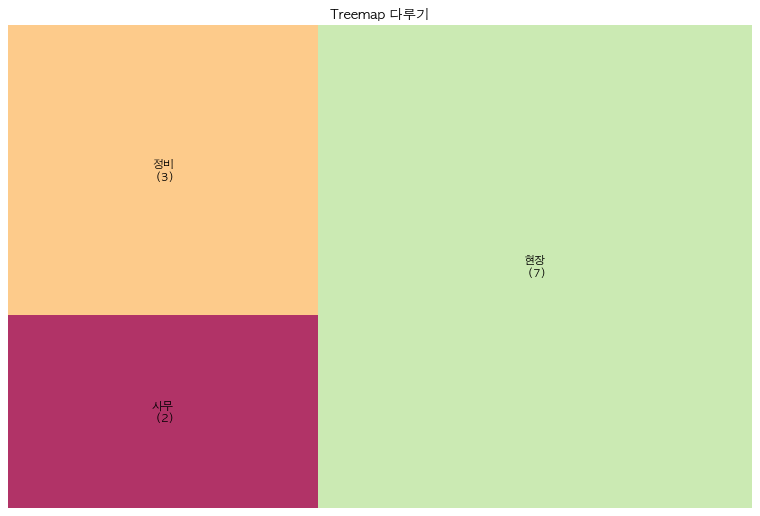

In [20]:
## 연습문제7) tree map ################################################################################
print('TreeMap')
# pip install squarify
import squarify

### data load
df = welfare.groupby('department').size().reset_index(name='counts')
print('df')
print(df)

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
print('labels') # 각 셀에 들어갈 레이블 텍스트
print(labels)

sizes = df['counts'].values.tolist()

print('sizes')
print(sizes)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

print('colors')
print(colors)

# Draw Plot
fig7 = plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap 다루기')
plt.axis('off')

### file save
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

## 8. stem plot

Stem Plotting
newwelfare
0     100
1      50
2      70
3      50
4      50
5      40
6      80
7      30
8      10
9      20
10     60
11     80
Name: cancer, dtype: int64
SpecialPlot_06.png 파일이 저장되었습니다.


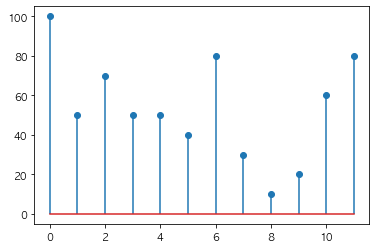

In [21]:
## 연습문제8) stem plot ################################################################################
print('Stem Plotting')

### data load
newwelfare = welfare['cancer'].head(100)

print('newwelfare')
print(newwelfare)

fig8 = plt.figure()
x = np.arange(len(newwelfare))
y = np.array(newwelfare)

plt.stem(x, y)

### file save
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')